In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


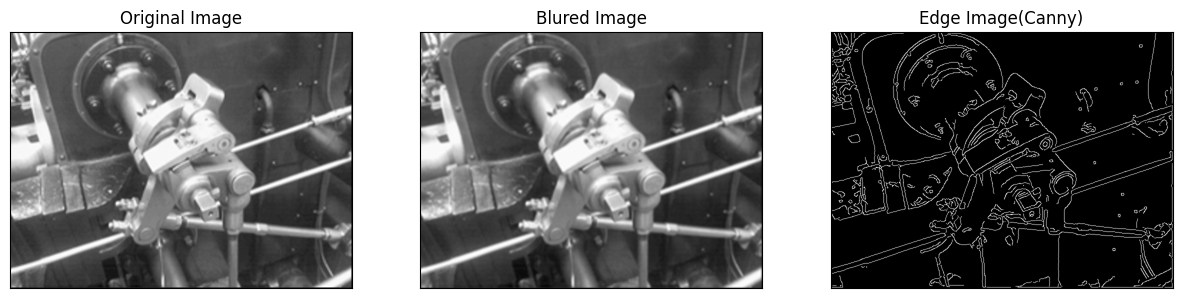

In [ ]:
"""
  直接使用cv2.Canny()
"""

import cv2
import numpy as np
from matplotlib import pyplot as plt

# 读取图像
img_1_path = '/content/drive/MyDrive/CodeSpace/CUHK/CMSC_CV/EdgeDetection/example_1.png'
image = cv2.imread(img_1_path, cv2.IMREAD_GRAYSCALE)  # 0表示以灰度模式读取图像
# print(f"sahpe={image.shape}")

# 显示原图像和边缘检测后的图像
plt.figure(figsize=(15, 9))
plt.subplot(131), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

# 应用高斯模糊进行去噪
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

plt.subplot(132), plt.imshow(blurred_image, cmap='gray')
plt.title('Blured Image'), plt.xticks([]), plt.yticks([])

# 应用Canny边缘检测
low_threshold = 20  # 设置低阈值
high_threshold = 100  # 设置高阈值
edges = cv2.Canny(blurred_image, low_threshold, high_threshold)

plt.subplot(133), plt.imshow(edges, cmap='gray')
plt.title('Edge Image(Canny)'), plt.xticks([]), plt.yticks([])

plt.show()

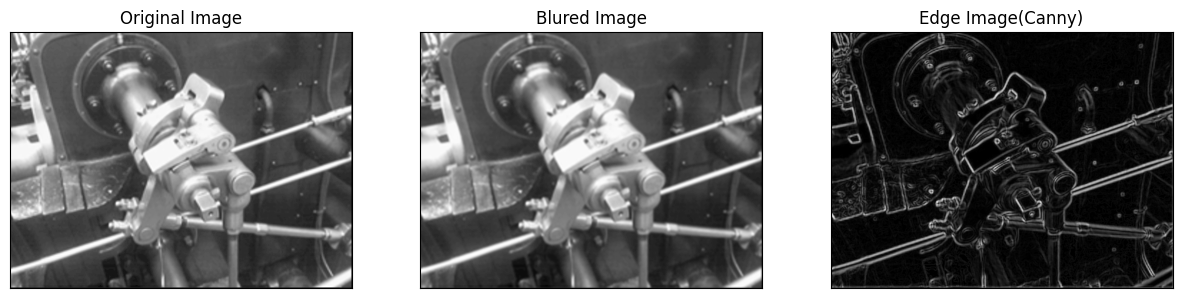

In [ ]:
"""
  自己实现一个简单的Canny Edge Detector
  pending........
  参考1：https://cloud.tencent.com/developer/article/2091830
  参考2：https://www.aiuai.cn/aifarm482.html
"""

import cv2
import numpy as np
from matplotlib import pyplot as plt

# 读取图像
img_1_path = '/content/drive/MyDrive/CodeSpace/CUHK/CMSC_CV/EdgeDetection/example_1.png'
image = cv2.imread(img_1_path, cv2.IMREAD_GRAYSCALE)  # 0表示以灰度模式读取图像
# print(f"sahpe={image.shape}")

# 显示原图像和边缘检测后的图像
plt.figure(figsize=(15, 9))
plt.subplot(131), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

# 应用高斯模糊进行去噪
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)
plt.subplot(132), plt.imshow(blurred_image, cmap='gray')
plt.title('Blured Image'), plt.xticks([]), plt.yticks([])

# 使用Sobel获取x,y方向上的梯度G
scale = 1
delta = 0
ddepth = cv2.CV_16S
ksize = 3
grad_x = cv2.Sobel(image, ddepth, 1, 0, ksize=ksize)
grad_y = cv2.Sobel(image, ddepth, 0, 1, ksize=ksize)
abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)
grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
eps = pow(1.0, -5)
theta = np.arctan((abs_grad_y + eps)/(abs_grad_x + eps))

# 应用Canny边缘检测
# low_threshold = 20  # 设置低阈值
# high_threshold = 100  # 设置高阈值
# edges = cv2.Canny(blurred_image, low_threshold, high_threshold)

# todo: 实现最大值抑制 + 滞后阈值

plt.subplot(133), plt.imshow(grad, cmap='gray')
plt.title('Edge Image(Canny)'), plt.xticks([]), plt.yticks([])

plt.show()